In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Titanic data.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.drop("PassengerId",axis=1,inplace=True)

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
data[data==0].count()

Survived    549
Pclass        0
Name          0
Sex           0
Age           0
SibSp       608
Parch       678
Ticket        0
Fare         15
Cabin         0
Embarked      0
dtype: int64

In [8]:
data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
li=list(data[data["Survived"]==0].sample(n=200).index)

In [11]:
data.drop(li,inplace=True)

In [12]:
data["Survived"].value_counts()

0    349
1    342
Name: Survived, dtype: int64

In [13]:
data.reset_index(drop=True,inplace=True)

In [14]:
x=data.drop("Survived",axis=1)
y=data["Survived"]

In [15]:
x.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         137
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       512
Embarked      2
dtype: int64

In [16]:
x["Age"].isnull().sum()

137

In [17]:
x.drop("Age",axis=1,inplace=True)

In [18]:
x.drop("Cabin",axis=1,inplace=True)

In [19]:
x["Embarked"].value_counts()

S    484
C    140
Q     65
Name: Embarked, dtype: int64

In [20]:
x["Embarked"]=x["Embarked"].fillna("S")

In [21]:
x["Embarked"].value_counts()

S    486
C    140
Q     65
Name: Embarked, dtype: int64

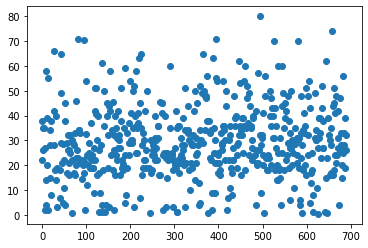

In [22]:
plt.scatter(data["Age"].index,data["Age"])

In [23]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
for i in x.columns:
    if isinstance(x[i][0],str):
        x[i]=encoder.fit_transform(x[i])

In [24]:
#feature selection
#Vif must be less than 1.7
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_vif=add_constant(x)
pd.Series([variance_inflation_factor(x_vif.values,i)for i in range(x_vif.shape[1])],index=x_vif.columns)


C:\Users\welcome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const       21.779658
Pclass       1.721790
Name         1.006992
Sex          1.115427
SibSp        1.219683
Parch        1.269360
Ticket       1.169613
Fare         1.661928
Embarked     1.091452
dtype: float64

In [25]:
#statistical test
#anova
X=x.drop(["Pclass","Name","Sex","Embarked"],axis=1)
import scipy.stats as stats
pd.Series([stats.f_oneway(X[i],y) for i in X.columns],index=X.columns)

SibSp        (1.1076548778252393, 0.2927765403933172)
Parch       (5.792419627749574, 0.016226115339105042)
Ticket    (1958.2996806111134, 5.39041192190608e-267)
Fare        (298.8317459011865, 9.26601650715474e-61)
dtype: object

In [26]:
x.columns

Index(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [27]:
#categorical 
#chi square
X1=x.drop(["Fare","Ticket","Parch","SibSp"],axis=1)
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X1.columns:
    dfObserved = pd.crosstab(X1[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = p

Significance.sort_values()


Sex         6.295243e-47
Pclass      3.769543e-18
Embarked    4.168371e-05
Name        4.821129e-01
dtype: float64

In [28]:
Significance = pd.Series()

for i in X1.columns:
    dfObserved = pd.crosstab(X1[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = (1-p)*100

Significance.sort_values()


Name         51.788706
Embarked     99.995832
Pclass      100.000000
Sex         100.000000
dtype: float64

In [29]:
x.drop("Name",axis=1,inplace=True)

In [30]:
x.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.6)


In [32]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [33]:
lg.fit(train_x,train_y)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
lg.score(train_x,train_y)

0.8091787439613527

In [35]:
lg.score(test_x,test_y)

0.776173285198556

In [36]:
pred=lg.predict(test_x)

In [58]:
pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [47]:
pred.shape

(277,)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,test_y)

array([[118,  39],
       [ 23,  97]], dtype=int64)

In [42]:
accuracy=(23+39)/(23+39+118+97)

In [43]:
accuracy

0.22382671480144403

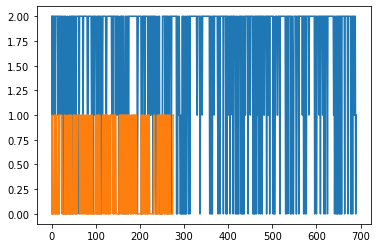

In [70]:
plt.plot(x["Embarked"].index,x["Embarked"])
plt.plot(pred)
